In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import confusion_matrix, classification_report
from tkinter import Tk, filedialog




In [3]:
model = tf.keras.models.load_model("pest_detection_model.h5")
TEST_PATH = "C:/Users/HP/Downloads/pests dataset/test"
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    TEST_PATH, target_size=(160, 160), batch_size=32, class_mode='categorical', shuffle=False
)


Found 1266 images belonging to 18 classes.


In [4]:

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


y_pred = model.predict(test_generator)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = test_generator.classes

cm = confusion_matrix(true_categories, predicted_categories)
print(classification_report(true_categories, predicted_categories, target_names=list(test_generator.class_indices.keys())))


40/40 [==============================] - 12s 267ms/step - loss: 0.5689 - accuracy: 0.8175
Test Accuracy: 81.75%
40/40 [==============================] - 12s 290ms/step
                 precision    recall  f1-score   support

          Aphid       0.44      0.35      0.39        20
Colorado beetle       0.85      0.96      0.90        47
    Gryllotalpa       0.63      0.93      0.75        28
       Mealybug       0.45      1.00      0.62        37
       Whitefly       0.86      0.25      0.39        24
       Wireworm       0.58      1.00      0.73        11
           ants       0.83      0.97      0.89        99
           bees       0.88      0.96      0.92        95
         beetle       0.68      0.53      0.60        85
   catterpillar       0.90      0.63      0.74       105
     earthworms       0.84      0.69      0.76        77
         earwig       0.75      0.61      0.67        76
    grasshopper       0.80      0.74      0.77        95
           moth       0.94      0

In [10]:

def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (160, 160)) / 255.0
    img_expanded = np.expand_dims(img_resized, axis=0)
    
    prediction = model.predict(img_expanded)
    predicted_class = np.argmax(prediction)
    class_names = list(test_generator.class_indices.keys())
    predicted_label = class_names[predicted_class]
    confidence = np.max(prediction) * 100
    
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    print(f"Predicted Class: {predicted_label} | Confidence: {confidence:.2f}%")

1/1 [==============================] - 1s 1s/step


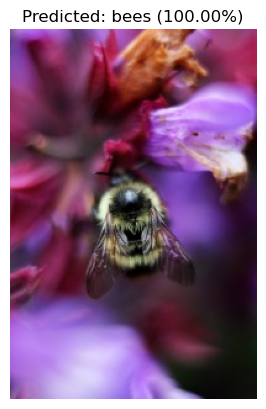

Predicted Class: bees | Confidence: 100.00%


In [11]:

def choose_and_predict():
    Tk().withdraw()
    image_path = filedialog.askopenfilename()
    if image_path:
        predict_image(image_path)

def predict_random():
    import random
    random_index = random.randint(0, len(test_generator.filepaths) - 1)
    random_image_path = test_generator.filepaths[random_index]
    predict_image(random_image_path)
    
def capture_and_predict():
    cam = cv2.VideoCapture(0)
    ret, frame = cam.read()
    if ret:
        cam.release()
        cv2.destroyAllWindows()
        cv2.imwrite("captured_image.jpg", frame)
        predict_image("captured_image.jpg")
    else:
        print("Failed to capture image.")
predict_random()  

      
